# Import Libraries

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Dataset Path

In [3]:
dataset_path = 'dataset/images/'

# Image Height and Width

In [4]:
img_h, img_w = 64, 64

# Load Data

In [5]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_w, img_h))
            images.append(img)
            labels.append(label)
    return images, labels

In [6]:
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

In [7]:
features = []
labels = []

In [8]:
for idx, cls in enumerate(classes):
    folder = os.path.join(dataset_path, cls)
    image, label = load_images_from_folder(folder, cls)
    features.extend(image)
    labels.extend(label)

features = np.array(features)
labels = np.array(labels)

# Visualize

# Flatten Image

In [9]:
num_samples = features.shape[0]
features_flattened = features.reshape(num_samples, -1)

In [10]:
features_flattened.shape

(5000, 12288)

# Split Dataset

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features_flattened, labels, test_size=0.2, random_state=11)

# Train KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Predict

In [13]:
knn_predictions = knn.predict(x_test)
print("KNN Classification Report")
print(classification_report(y_test, knn_predictions))
print("KNN Accuracy: ", accuracy_score(y_test, knn_predictions))

KNN Classification Report
              precision    recall  f1-score   support

       bibek       1.00      1.00      1.00       179
      dipesh       1.00      1.00      1.00       209
       divya       1.00      1.00      1.00       192
       mikey       1.00      1.00      1.00       213
     sweksha       1.00      1.00      1.00       207

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

KNN Accuracy:  1.0


# Save Model

In [14]:
import joblib
joblib.dump(knn, 'face_attendance_model/img_knn_model.pkl')

['face_attendance_model/img_knn_model.pkl']

# Load and Test

In [15]:
import joblib
knn = joblib.load("face_attendance_model/img_knn_model.pkl")

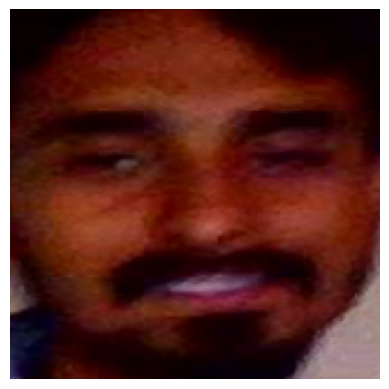

['dipesh']
[[0. 1. 0. 0. 0.]]


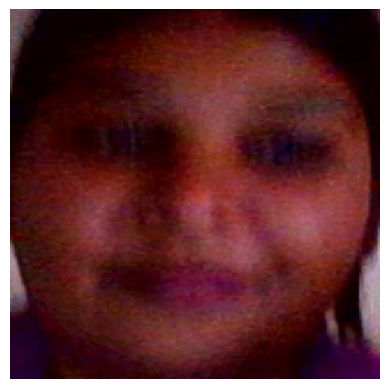

['sweksha']
[[0. 0. 0. 0. 1.]]


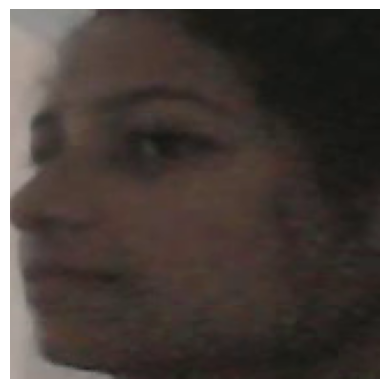

['divya']
[[0. 0. 1. 0. 0.]]


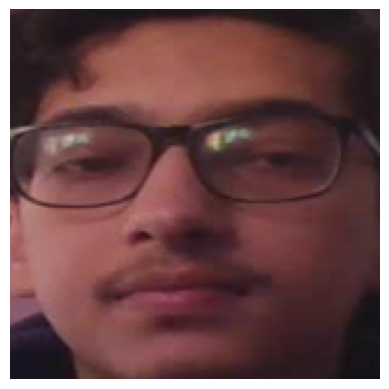

['bibek']
[[1. 0. 0. 0. 0.]]


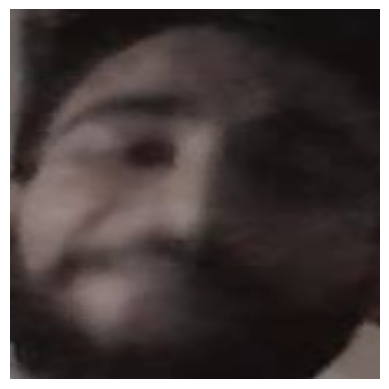

['mikey']
[[0. 0. 0. 1. 0.]]


In [16]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        img = cv2.resize(img, (64, 64))
        img = img.reshape(1, -1)

        prediction = knn.predict(img)
        print(prediction)
        proba = knn.predict_proba(img)
        print(proba)
        
    except Exception as e:
        print(e)

# SVM

In [17]:
svm = SVC(probability=True)
svm.fit(x_train, y_train)

SVC(probability=True)

In [18]:
svm_predictions = svm.predict(x_test)
print("SVM Classification Report")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy: ", accuracy_score(y_test, svm_predictions))

SVM Classification Report
              precision    recall  f1-score   support

       bibek       1.00      1.00      1.00       179
      dipesh       1.00      1.00      1.00       209
       divya       1.00      1.00      1.00       192
       mikey       1.00      1.00      1.00       213
     sweksha       1.00      1.00      1.00       207

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

SVM Accuracy:  1.0


# Save

In [19]:
import joblib
joblib.dump(svm, 'face_attendance_model/img_svm_model.pkl')

['face_attendance_model/img_svm_model.pkl']

In [20]:
import joblib

svm = joblib.load("face_attendance_model/img_svm_model.pkl")

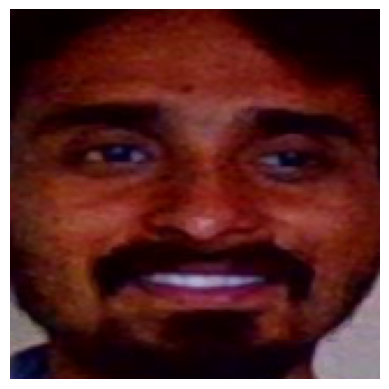

['dipesh']
[[7.12311834e-04 9.96610446e-01 4.51090431e-04 8.18723600e-04
  1.40742808e-03]]


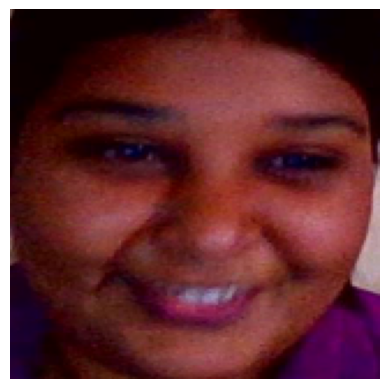

['sweksha']
[[7.14384399e-04 1.73684160e-03 3.48598530e-04 6.38388437e-04
  9.96561787e-01]]


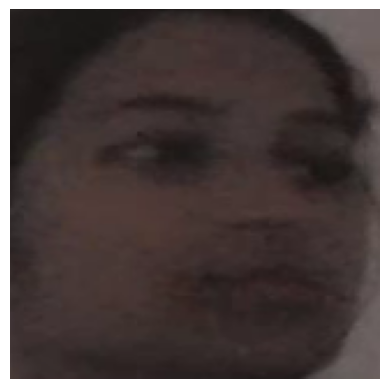

['divya']
[[1.02319534e-03 6.39990811e-04 9.96163291e-01 1.75410079e-03
  4.19421901e-04]]


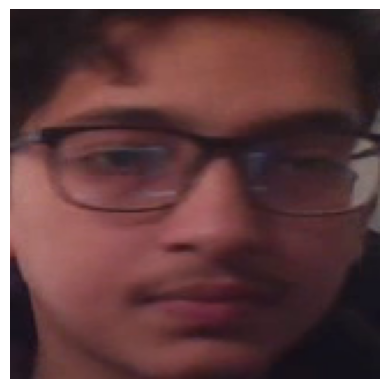

['bibek']
[[9.97306543e-01 3.98121528e-04 6.06525391e-04 1.14215066e-03
  5.46659611e-04]]


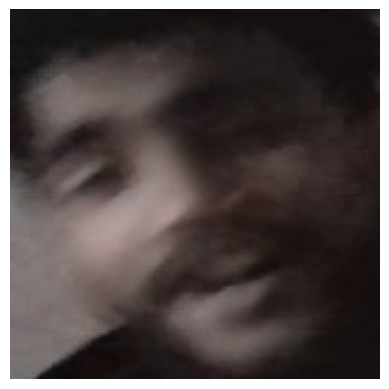

['mikey']
[[9.91137713e-04 4.22042418e-04 6.93311913e-04 9.97550130e-01
  3.43377836e-04]]


In [21]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        img = cv2.resize(img, (64, 64))
        img = img.reshape(1, -1)

        prediction = svm.predict(img)
        print(prediction)
        proba = svm.predict_proba(img)
        print(proba)
        
    except Exception as e:
        print(e)